### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.sample(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3957,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Single,...,1~3,gt8,1~3,1~3,1,1,0,0,1,1
2663,Work,Alone,Sunny,55,7AM,Bar,1d,Female,26,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,0
1651,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,26,Married partner,...,4~8,1~3,4~8,less1,1,1,0,0,1,0
11000,No Urgent Place,Alone,Snowy,30,10AM,Restaurant(<20),1d,Female,36,Single,...,less1,1~3,less1,less1,1,1,0,0,1,1
12339,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,31,Married partner,...,never,1~3,1~3,1~3,1,1,0,1,0,0
6370,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),2h,Female,26,Unmarried partner,...,gt8,gt8,gt8,gt8,1,1,0,0,1,1
4018,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,50plus,Married partner,...,gt8,4~8,4~8,4~8,1,0,0,1,0,0
1677,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,46,Single,...,less1,4~8,1~3,never,1,0,0,0,1,1
4532,No Urgent Place,Kid(s),Sunny,55,2PM,Coffee House,2h,Female,46,Married partner,...,less1,less1,1~3,less1,1,1,0,0,1,1
6035,No Urgent Place,Partner,Sunny,80,6PM,Restaurant(<20),1d,Female,26,Unmarried partner,...,less1,less1,1~3,less1,1,0,0,0,1,1


3. Decide what to do about your missing data -- drop, replace, other...

## Minor Updates 

A few tweaks to the data set. First, remove the 'car' column as it's not helpful given just 108/12684 data points. Second, fix the spelling error for passengers.


In [6]:
data = data.drop(columns=['car']) 
data = data.rename(columns={'passanger':'passenger'})
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [7]:
## Check Data Loss if Drop Null

In [8]:
datanonan = data.dropna()
datanonan.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [9]:
percent_data_retained = round(len(datanonan)/len(data) * 100, 2)
print(f'Percentage of data retained if drop nulls: {percent_data_retained}%')
percent_accepted_withnull = round(len(data[data['Y'] == 1])/len(data) * 100, 2)
percent_accepted_withoutnull = round(len(datanonan[datanonan['Y'] == 1])/len(datanonan) * 100, 2)
print(f'Percent of coupons accepted with nulls: {percent_accepted_withnull}% and without: {percent_accepted_withoutnull}%')


Percentage of data retained if drop nulls: 95.23%
Percent of coupons accepted with nulls: 56.84% and without: 56.93%


## Drop Them

Given that we keep more than 95% of the data when all nulls are dropped and the coupon acceptance rate differs by less than 0.1% between the two datasets, drop nulls and use that dataset for all analysis for consistency.

In [10]:
data = data.dropna()


4. What proportion of the total observations chose to accept the coupon? 

In [11]:
# Already did this when deciding to drop nulls from the dataset so look above for original proportion
# Here's the current proportion
percent_accepted = round(len(data[data['Y'] == 1])/len(data) * 100, 2)
print(f'Percent of coupons accepted: {percent_accepted}%')


Percent of coupons accepted: 56.93%


5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Coupon')

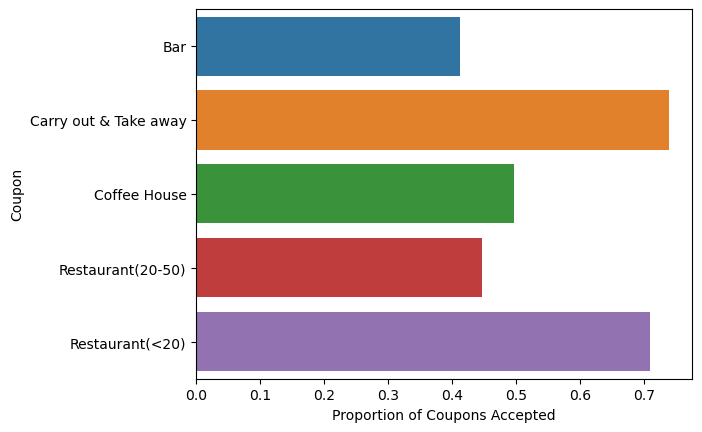

In [12]:
# Given the long coupon names, it's easier to read if they're on the Y axis
# Override the default ordering to be alphabetical to add some reason to the order and in particular
# so that the restaurant coupons are next to each other.
sns.barplot(data, x='Y', y='coupon', order=np.sort(data['coupon'].unique()), errorbar=None)
plt.xlabel('Proportion of Coupons Accepted')
plt.ylabel('Coupon')


6. Use a histogram to visualize the temperature column.

([<matplotlib.axis.XTick at 0xffff4b80c090>,
 [Text(30, 0, '30'), Text(55, 0, '55'), Text(80, 0, '80')])

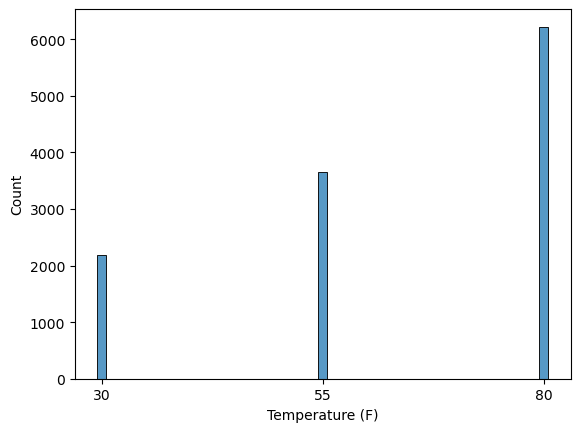

In [13]:
# The temp was only recorded as 30, 55, or 80, not a continuous range, so adjust parameters accordingly
ax = sns.histplot(data=data, x='temperature', stat='count', bins=3, discrete=True)
plt.xlabel("Temperature (F)")
plt.xticks(ticks=[30,55,80])


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
bardata = data.query('coupon == "Bar"')
print(f'Bar coupons represent {round(len(bardata)/len(data) * 100, 2)}% of total data points')
bardata.sample(5)

Bar coupons represent 15.84% of total data points


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8920,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,36,Single,...,less1,less1,4~8,less1,1,0,0,0,1,0
1800,Home,Alone,Sunny,55,6PM,Bar,1d,Male,36,Unmarried partner,...,less1,4~8,1~3,less1,1,0,0,1,0,1
9048,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,31,Married partner,...,less1,gt8,4~8,less1,1,0,0,0,1,1
11930,Work,Alone,Snowy,30,7AM,Bar,1d,Female,below21,Single,...,less1,1~3,1~3,1~3,1,1,1,0,1,1
10718,Work,Alone,Sunny,30,7AM,Bar,1d,Female,41,Single,...,less1,1~3,1~3,less1,1,1,0,1,0,0


2. What proportion of bar coupons were accepted?


Proportion of bar coupons accepted: 0.41


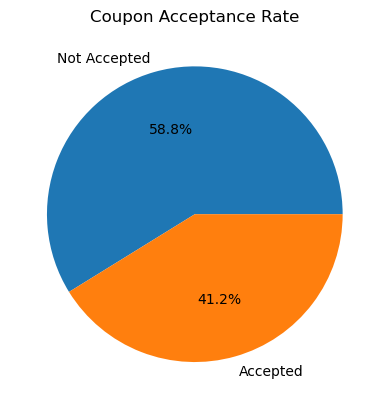

In [15]:
bar_coupons = len(bardata)
bar_coupons_accepted = len(bardata.query('Y == 1'))
bar_coupons_accepted_ratio = bar_coupons_accepted / bar_coupons
print(f'Proportion of bar coupons accepted: {round(bar_coupons_accepted_ratio, 2)}')

# Alternatively, could group by and count the Y / N values, which I'll do for the related visual
plt.pie(bardata.groupby('Y')['Y'].count(), labels=("Not Accepted", "Accepted"), autopct="%1.1f%%")
plt.title("Coupon Acceptance Rate")
plt.show()


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
# Check the set of potential values
bardata['Bar'].value_counts()


never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

Acceptance rate where visit bar <= 3x/mo: 0.37 (641/1720)
Acceptance rate where visit bar > 3x/mo:  0.76 (147/193)


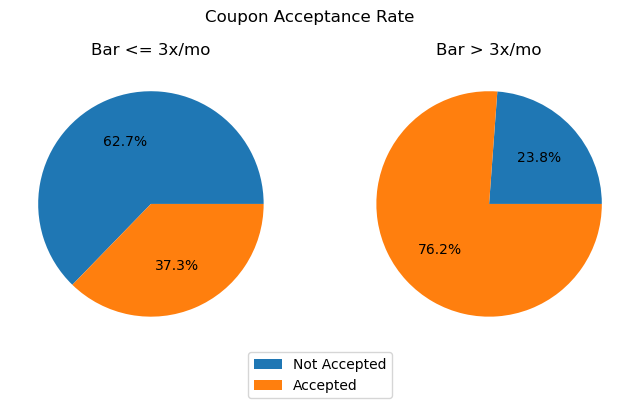

In [17]:
bardata_less3 = bardata.query('Bar in ["never", "less1", "1~3"]')
bardata_more3 = bardata.query('Bar in ["4~8", "gt8"]')
bar_less3_total = len(bardata_less3)
bar_more3_total = len(bardata_more3)
bar_less3_accepted = len(bardata_less3.query('Y == 1'))
bar_more3_accepted = len(bardata_more3.query('Y == 1'))
print(f'Acceptance rate where visit bar <= 3x/mo: {round(bar_less3_accepted / bar_less3_total, 2)} ({bar_less3_accepted}/{bar_less3_total})')
print(f'Acceptance rate where visit bar > 3x/mo:  {round(bar_more3_accepted / bar_more3_total, 2)} ({bar_more3_accepted}/{bar_more3_total})')

# Pie Charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(bardata_less3.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(bardata_more3.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="Bar <= 3x/mo")
axes[1].set_title(label="Bar > 3x/mo")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
# Create new column 'age_bounded' which is the numeric age, with below21 and 50plus adjusted to 20 and 50, respectively
ages = bardata['age'].copy()
ages = pd.to_numeric(ages.str.replace('below21', '20', regex=False).str.replace('50plus', '50', regex=False))
bardata.insert(bardata.shape[1], 'age_bounded', ages)
# Visual check
bardata.query('age in ["below21", "50plus"]').loc[:,('age','age_bounded')].value_counts()


age      age_bounded
50plus   50             273
below21  20              81
dtype: int64

Acceptance rate >25 and visit bar >1/mo: 0.69 (278/403)
Acceptance rate <=25 or visit bar <1/mo: 0.34 (510/1510)


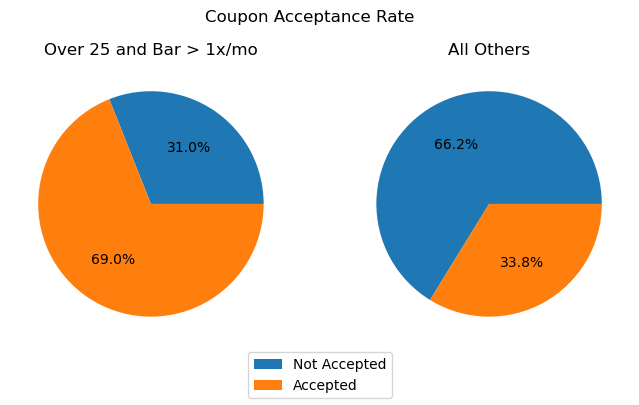

In [19]:
# Create groups a and b to compare acceptance rates between them
bardata_a = bardata.query('age_bounded > 25 and Bar in ["1~3", "4~8", "gt8"]')
bardata_b = bardata.query('not (age_bounded > 25 and Bar in ["1~3", "4~8", "gt8"])')
bar_a_y = len(bardata_a.query('Y == 1'))
bar_b_y = len(bardata_b.query('Y == 1'))
print(f'Acceptance rate >25 and visit bar >1/mo: {round(bar_a_y/len(bardata_a), 2)} ({bar_a_y}/{len(bardata_a)})')
print(f'Acceptance rate <=25 or visit bar <1/mo: {round(bar_b_y/len(bardata_b), 2)} ({bar_b_y}/{len(bardata_b)})')

# Pie Charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(bardata_a.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(bardata_b.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="Over 25 and Bar > 1x/mo")
axes[1].set_title(label="All Others")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [20]:
# Check potential values
print(bardata['passenger'].value_counts())
bardata['occupation'].value_counts()


Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: passenger, dtype: int64


Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Physical Social

Acceptance rate for those in the focus group: 0.6 (44/73)
Acceptance rate for those not in the focus group: 0.4 (744/1840)


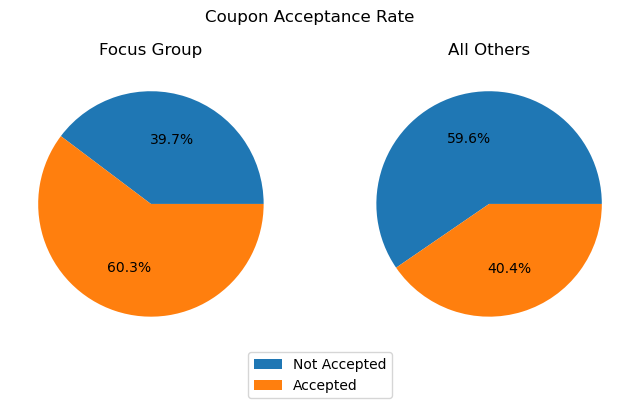

In [21]:
focus_group_query = 'Bar in ["1~3", "4~8", "gt8"] and passenger in ["Friends(s)", "Partner"] and occupation != "Farming Fishing & Forestry"'
not_focus_group_query = f'not ({focus_group_query})'
bardata_a = bardata.query(focus_group_query)
bardata_b = bardata.query(not_focus_group_query)
bar_a_y = len(bardata_a.query('Y == 1'))
bar_b_y = len(bardata_b.query('Y == 1'))
print(f'Acceptance rate for those in the focus group: {round(bar_a_y/len(bardata_a), 2)} ({bar_a_y}/{len(bardata_a)})')
print(f'Acceptance rate for those not in the focus group: {round(bar_b_y/len(bardata_b), 2)} ({bar_b_y}/{len(bardata_b)})')

# Pie Charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(bardata_a.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(bardata_b.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="Focus Group")
axes[1].set_title(label="All Others")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [22]:
bardata['income'].value_counts()

$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: income, dtype: int64

In [23]:
bardata['RestaurantLessThan20'].value_counts()

1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: RestaurantLessThan20, dtype: int64

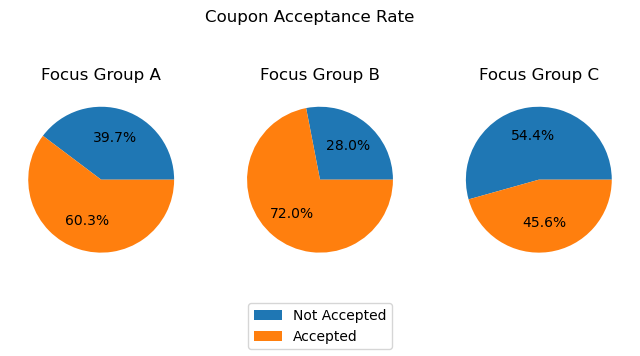

In [24]:

bardata_a = bardata.query('Bar in ["1~3", "4~8", "gt8"] and passenger in ["Friends(s)", "Partner"] and maritalStatus != "Widowed"')
bardata_b = bardata.query('Bar in ["1~3", "4~8", "gt8"] and age_bounded < 30')
# The question said "more than 4 times a month," but the data doesn't differentiate between 4 through 8. Going to include that group.
bardata_c = bardata.query('RestaurantLessThan20 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')

# Pie Charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3.5))
pie1 = axes[0].pie(bardata_a.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(bardata_b.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie3 = axes[2].pie(bardata_c.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="Focus Group A")
axes[1].set_title(label="Focus Group B")
axes[2].set_title(label="Focus Group C")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
plt.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers accepting bar coupons tend to already go to the bar regularly. Other factors such as age, passengers, and income are not as clear based solely on the analysis above, but checking for a few alternative combinations shows, for example, that they are more likely to be under 30.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of drivers who accept the coupons.  

**Investigating the Restaurant \\$20 to \\$50 Coupons**

For this exercise, I'll explore the factors impacting acceptance rates for coupons to restaurants costing \\$20-\\$50.


In [25]:
rest2050 = data.query('coupon == "Restaurant(20-50)"')
print(f'Number of records for the Restaurant $20-$50 coupon: {len(rest2050)}')

Number of records for the Restaurant $20-$50 coupon: 1417


***Overall Acceptance Rate***

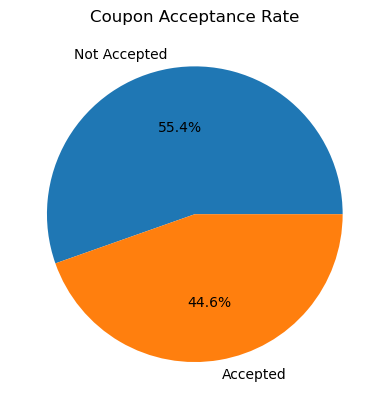

In [26]:
plt.pie(rest2050.groupby('Y')['Y'].count(), labels=("Not Accepted", "Accepted"), autopct="%1.1f%%")
sns.set_palette('Paired')
plt.title("Coupon Acceptance Rate")
plt.show()


***Hypothesis 1: Increased Acceptance when Direction Same***

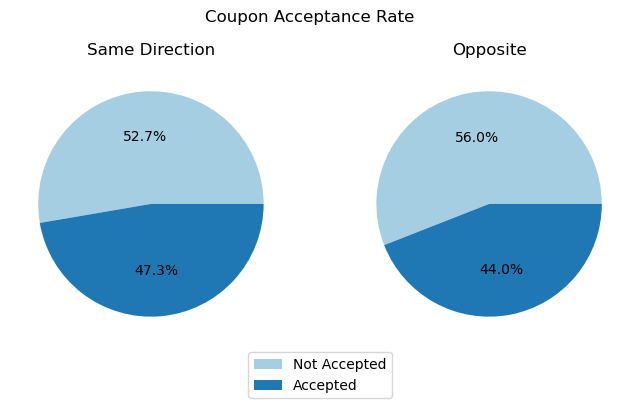

In [27]:
rest2050_a = rest2050.query('direction_same == 1')
rest2050_b = rest2050.query('direction_same == 0')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(rest2050_a.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(rest2050_b.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="Same Direction")
axes[1].set_title(label="Opposite")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
sns.set_palette('Paired')
plt.show()

***Hypothesis 2: Increased Acceptance when Direction Same and Destination Home***

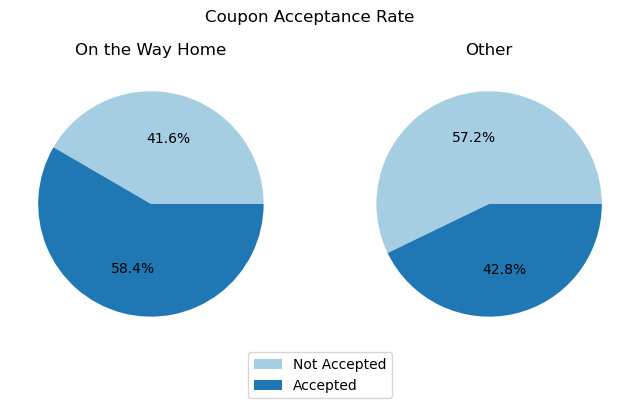

In [28]:
rest2050_a = rest2050.query('direction_same == 1 and destination == "Home"')
rest2050_b = rest2050.query('not (direction_same == 1 and destination == "Home")')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(rest2050_a.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(rest2050_b.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="On the Way Home")
axes[1].set_title(label="Other")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
sns.set_palette('Paired')
plt.show()

In [29]:
rest2050['time'].value_counts()

7AM     410
6PM     368
10PM    357
2PM     175
10AM    107
Name: time, dtype: int64

***Hypothesis 3: Increased Acceptance when Coupon Time in the Afternoon***

Analysis: It turns out that the 10am coupons are the most successful, followed by 2 and 6pm

/tmp/ipykernel_58716/1842396668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest2050['time'] = pd.Categorical(rest2050['time'], ['7AM', '10AM', '2PM', '6PM', '10PM'])


Text(0.5, 1.0, 'Coupons Accepted by Time')

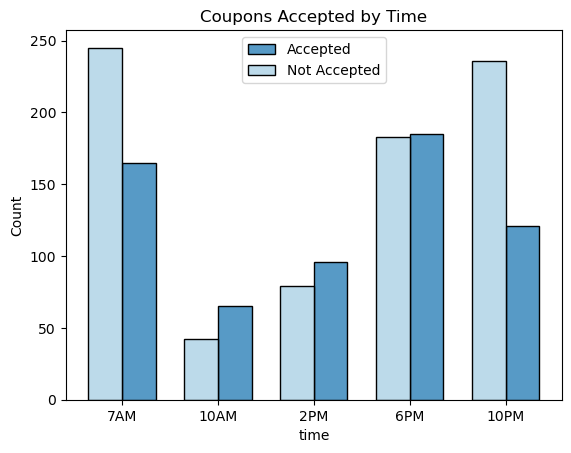

In [30]:
rest2050['time'] = pd.Categorical(rest2050['time'], ['7AM', '10AM', '2PM', '6PM', '10PM'])
ax = sns.histplot(data=rest2050, x='time', hue='Y', multiple='dodge', shrink=0.7)
ax.legend(labels=('Accepted','Not Accepted'))
ax.set_title('Coupons Accepted by Time')


***Hypothesis 4: Increased Acceptance when On the Way Home and Coupon Time in the Afternoon***


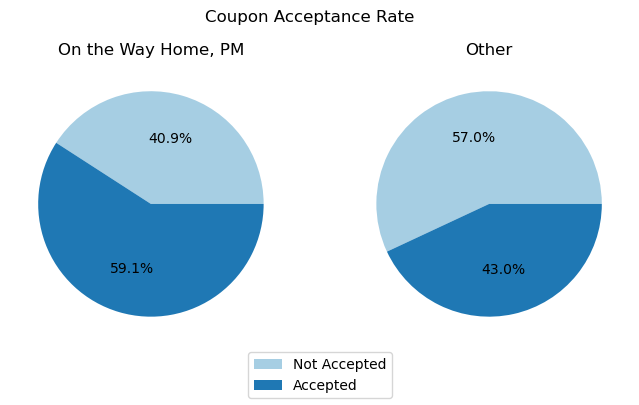

In [31]:
query_a = 'direction_same == 1 and destination == "Home" and time in ["2PM","6PM"]'
rest2050_a = rest2050.query(query_a)
rest2050_b = rest2050.query(f'not ({query_a})')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(rest2050_a.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(rest2050_b.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="On the Way Home, PM")
axes[1].set_title(label="Other")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
sns.set_palette('Paired')
plt.show()

***Hypothesis 5: People with a Partner or Friend in the Car are More Likely to Accept***

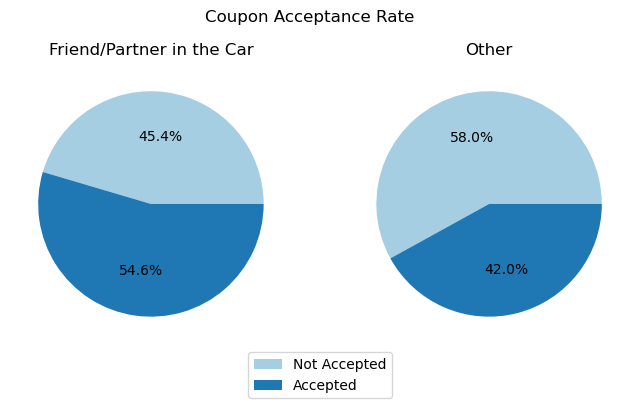

In [32]:

query_a = 'passenger in ["Friend(s)", "Partner"]'
rest2050_a = rest2050.query(query_a)
rest2050_b = rest2050.query(f'not ({query_a})')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(rest2050_a.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(rest2050_b.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="Friend/Partner in the Car")
axes[1].set_title(label="Other")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
sns.set_palette('Paired')
plt.show()

***Hypothesis 6: People with Kids in the Car are Least Likely to Accept***

Text(0.5, 1.0, 'Coupons Accepted by Passenger')

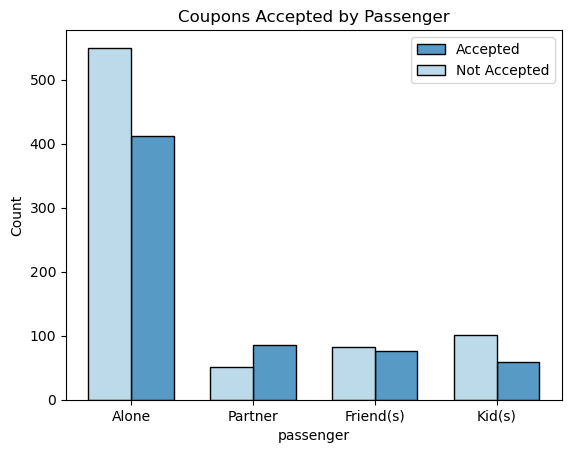

In [33]:
ax = sns.histplot(data=rest2050, x='passenger', hue='Y', multiple='dodge', shrink=0.7)
ax.legend(labels=('Accepted','Not Accepted'))
ax.set_title('Coupons Accepted by Passenger')


**Summary**

Many factors appear to influence whether or not a driver accepts a coupon to an upscale restaurant, including:
* a minor impact based on direction of travel relative to the restaurant
* a more meaningful impact if it's on their way home
* a significant impact based on time of day, with the earliest and latest coupons being far less successful than others
* a significant impact based on who they are traveling with, if anyone

Further analysis could lend to a number of other insights, including the relevance of one's income, the distance in time to the restaurant, and whether those that accept coupons for less expensive restaurants are also more likely to accept those to more expensive ones.